# Generate figures for main paper

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy.random as random
import ipdb
import copy

#torch stuff
import torch
import pytorch_lightning as pl

#analysis / software for ml
from ana_lib.custom_plmodels import *
from ana_lib.optuna_utils import *
from ana_lib.noise import *
from ana_lib.pat_utils import *
from ana_lib.pl_callbacks import *
from ana_lib.pl_utils import *
from ana_lib.plot_utils import *
from ana_lib.process_spectrum import *
from ana_lib.torch_loader import *
from ana_lib.utils import *


import pandas

In [12]:
Identity_path= 'logs/manifold_only_NLoscReDo_March17/7C3L1C_T100_70D_L0_lr0p75_gap1_gw5_i196_arIC_identity/metrics.csv'

EXP1_path ='logs/manifold_only_NLoscReDo_March17/7C3L1C_T100_70D_L0_lr0p75_gap1_gw5_i196_arIC_EXP/metrics.csv'
EXP2_path ='logs/manifold_only_NLoscReDo_March17/7C3L1C_T100_70D_L0_lr0p75_gap1_gw5_i196_arIC_EXP_lr2/metrics.csv'

In [13]:
exp1 = pandas.read_csv(os.getcwd()+'/'+EXP1_path)
exp2 = pandas.read_csv(os.getcwd()+'/'+EXP2_path)
ide = pandas.read_csv(os.getcwd()+'/'+Identity_path)

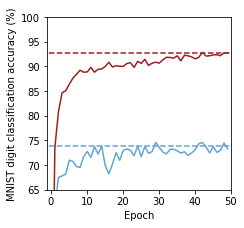

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(3,3))
#ax.set_yscale('log')
#ax.set_ylim(0.5, 100)
#ax.set_xlim(8E-3, 1E3)
ax.set_xlabel("Epoch")
ax.set_ylabel("MNIST digit classification accuracy (%)")
#ax.grid(True)

ax.set_position([0.1,0.15,0.85,0.8])


color1=(158/255, 30/255, 30/255)
color2=(97/255, 166/255, 211/255)
plt.plot(np.arange(-5,70),np.ones(75)*0.927*100,'--',color=color1)

plt.plot(np.arange(-5,70),np.ones(75)*0.738*100,'k--',color=color2)


y1 =exp1['val_accu'].dropna()
y2 =exp2['val_accu'].dropna()

yp = np.hstack((y1,y2))
x1 = exp1['step'][y1.keys()].values[:len(y1)]
x2 = exp1['step'][y2.keys()].values[:len(y2)]+x1[-1]
xp = np.hstack((x1,x2))
steps_per = 600




plt.plot(xp[:-1:10]/steps_per,yp[:-1:10]*100,'-',color=color1,alpha=1,label='Experiment - PAT (Validation)')


y = ide['val_accu'].dropna()
x = ide['step'][y.keys()].values
y = y.values
plt.plot(x[:-1:10]/steps_per,y[:-1:10]*100,'-',color=color2,label='Identity model (validation)')



#plt.legend()

plt.ylim(0.65*100,1*100)
plt.xlim(-1,50)
plt.savefig('figures/Fig4_ePNN.svg', dpi=300, format="svg")

In [15]:
data = torch.load('Test_RunMarch23_test_EXP')

y_pred_exp = torch.max(data['y_hat_exp'].data,1)[1]
    
y_pred_dt = torch.max(data['y_hat_dt'].data,1)[1]
    
y = data['yt']
    
accuracy_exp_dt = accu_metric(y_pred_exp, y_pred_dt)
print(accuracy_exp_dt)    

accuracy_exp_test = accu_metric(y_pred_exp, y)
print(accuracy_exp_test)

accuracy_dt_test = accu_metric(y_pred_dt, y)
print(accuracy_dt_test)


target = y 
pred = y_pred_exp.detach().numpy()

tensor(0.9532)
tensor(0.9272)
tensor(0.9337)


In [16]:
from pytorch_lightning.metrics import Accuracy
import torch
import seaborn as sns
from sklearn.metrics import confusion_matrix
import seaborn as sns
import sklearn.metrics as metric

#equalize number of targets
Ndig = 100
target_eq=list()
pred_eq=list()
count = np.zeros(10)
for idx in range(len(pred)):
    ti=target[idx]
    yi=pred[idx]
    count[ti]+=1
    if count[ti]<=Ndig:
        target_eq.append(ti)
        pred_eq.append(yi)

conf = metric.confusion_matrix(target_eq, pred_eq)

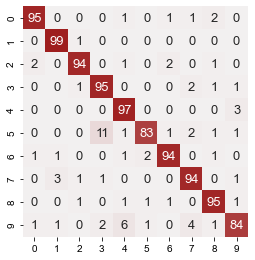

In [17]:
color1=(158/255, 30/255, 30/255)
custom_cmap1 = sns.light_palette(color1, as_cmap=True)
fig, ax = plt.subplots(1,1, figsize = (4,4))
ax.set_position([0.2,0.18,0.78,0.8])
sns.set(font_scale=1.4)#for label size
sns.color_palette("Spectral")
sns.heatmap(conf,cmap=custom_cmap1, annot=True, annot_kws={"size": 13}, cbar=False, fmt = 'd')# font size
plt.savefig(f"figures/confusion_matrix1.svg", dpi=300, format="svg")